In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import math
import numpy as np
sns.set(rc={'figure.figsize':(20,8)});

In [3]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 286.5 KB


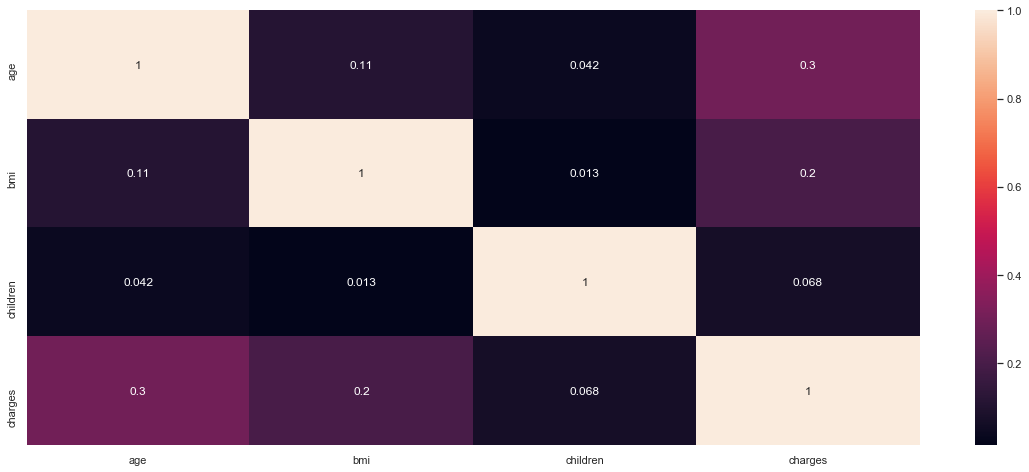

In [5]:
sns.heatmap(data.corr(),annot=data.corr());

Kolom age mempunyai skewness 0.05567251565299186.


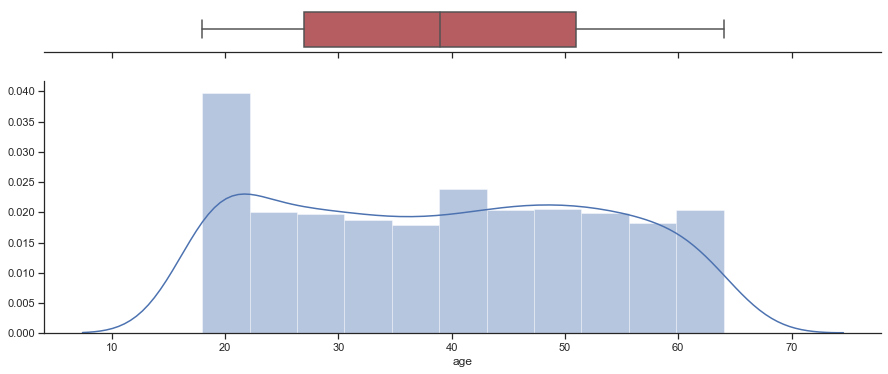

In [6]:
def distribusi(kolom,data):
    skewness = data.loc[:,kolom].skew()
    print("Kolom {} mempunyai skewness {}.".format(kolom,skewness))
    sns.set(style="ticks")
    f, (ax_box,ax_hist) = plt.subplots(2,sharex=True, figsize=(15,6),
                                      gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_box, color='r').set_xlabel('')
    sns.distplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_hist, color='b')
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True);
distribusi('age',data)

Kolom bmi mempunyai skewness 0.2840471105987448.


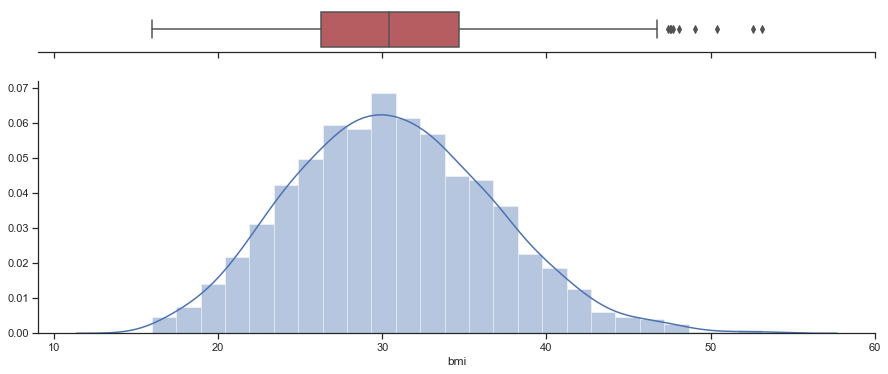

In [7]:
distribusi("bmi",data)

Kolom charges mempunyai skewness 1.5158796580240388.


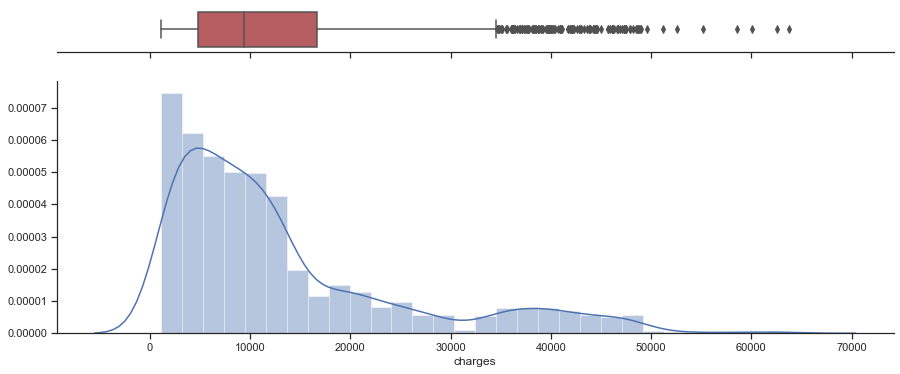

In [8]:
distribusi("charges",data)

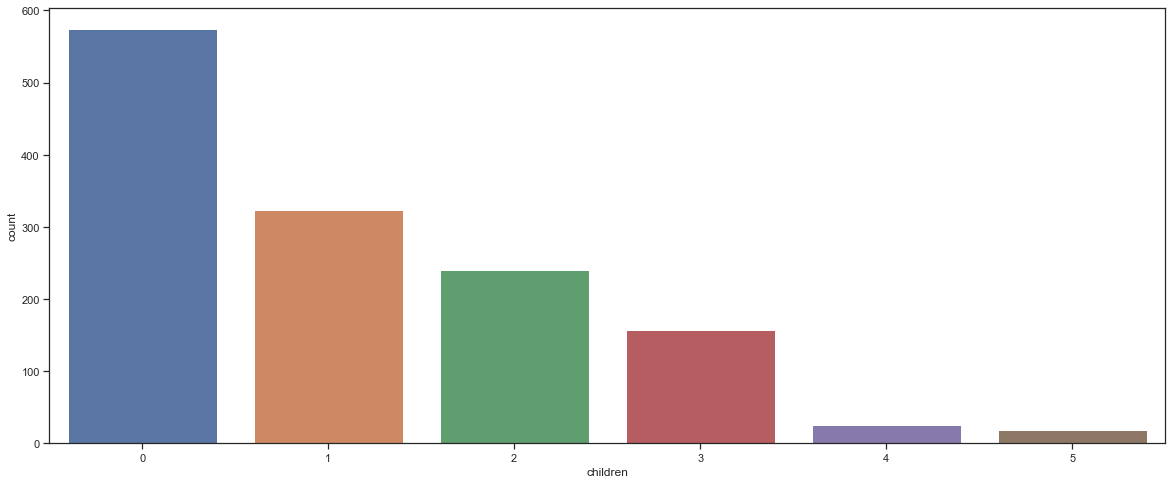

In [9]:
sns.countplot(x=data.children);

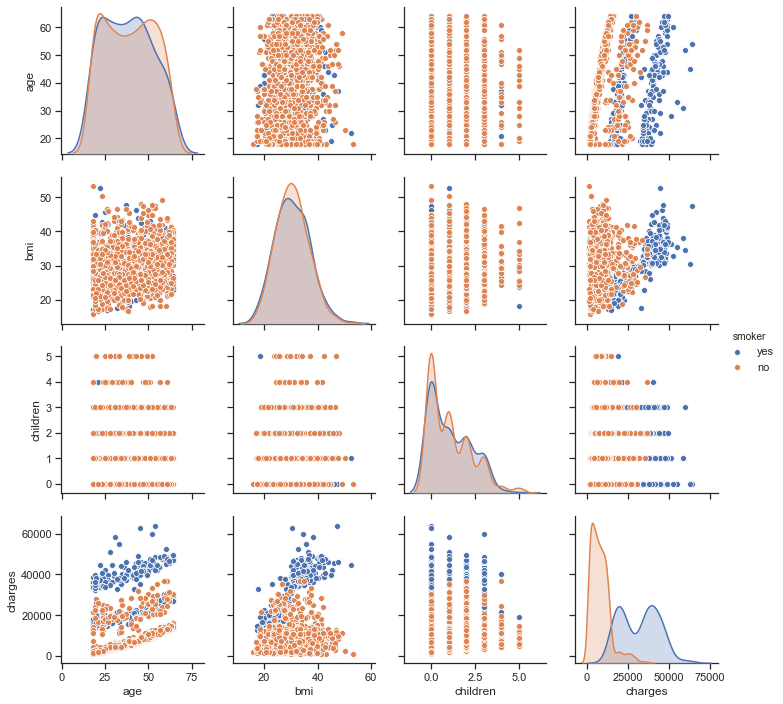

In [10]:
sns.pairplot(data, hue="smoker");

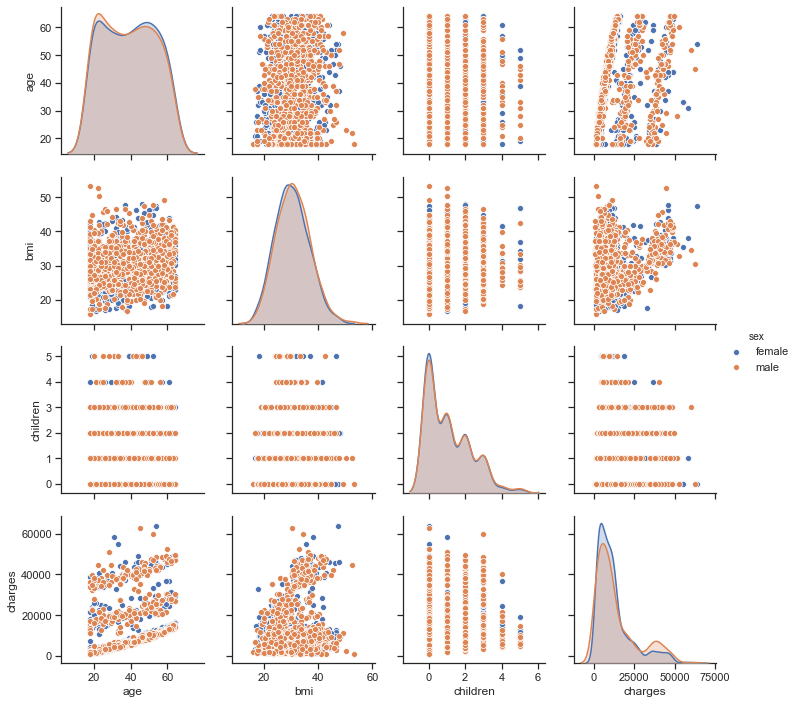

In [11]:
sns.pairplot(data, hue="sex");

In [12]:
data.smoker.replace({'yes':1,'no':0},inplace=True)
data.sex.replace({'male':1,'female':0},inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
summary = data.describe()
Q1_bmi = summary.loc["25%","bmi"]
Q3_bmi = summary.loc["75%","bmi"]
IQR_bmi = Q3_bmi - Q1_bmi
upper_bound = Q3_bmi + IQR_bmi
print("Ada sebanyak {} outlier pada kolom bmi.".format(len(data[data.loc[:,"bmi"]>upper_bound])))
data = data[data.loc[:,"bmi"]<upper_bound]

Ada sebanyak 33 outlier pada kolom bmi.


In [12]:
data.smoker.replace({'yes':1,'no':0},inplace=True)
data.sex.replace({'male':1,'female':0},inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Kolom bmi mempunyai skewness 0.008867361551708195.


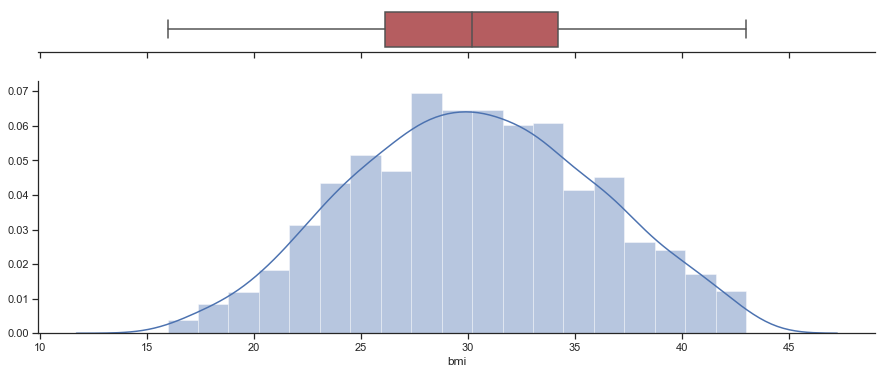

In [14]:
distribusi("bmi",data)

In [13]:
summary = data.describe()
Q1_bmi = summary.loc["25%","bmi"]
Q3_bmi = summary.loc["75%","bmi"]
IQR_bmi = Q3_bmi - Q1_bmi
upper_bound = Q3_bmi + IQR_bmi
print("Ada sebanyak {} outlier pada kolom bmi.".format(len(data[data.loc[:,"bmi"]>upper_bound])))
data = data[data.loc[:,"bmi"]<upper_bound]

Ada sebanyak 33 outlier pada kolom bmi.


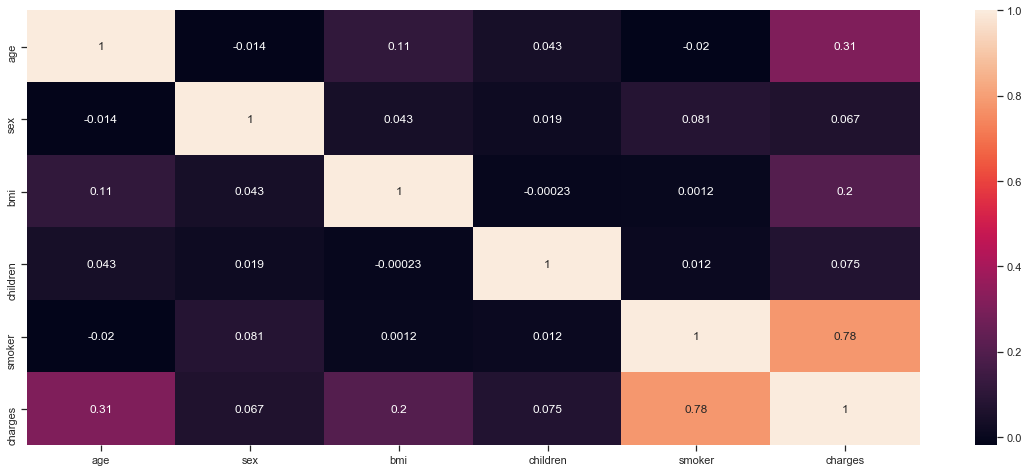

In [15]:
sns.heatmap(data.corr(),annot=data.corr());

In [16]:
x = data[['age','bmi','smoker']].values
y = data['charges'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)

In [17]:
lm1 = sm.OLS(y_train,x_train).fit()
lm1.params

array([  198.64793655,    37.47774756, 22551.10184769])

In [18]:
lin_reg = LinearRegression(normalize=True,n_jobs=-1,copy_X=False)
lin_reg.fit(x_train, y_train)
r2 = lin_reg.score(x_test, y_test)
print(lin_reg.coef_)
print(lin_reg.intercept_)
print('R^2: {0}'.format(r2))

[  254.75308169   357.72507752 23044.24167782]
-12360.78596931007
R^2: 0.7699037320537236


In [19]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [20]:
def linear_assumption(model, features, label):

    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    df_results = calculate_residuals(model, features, label)
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show();

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


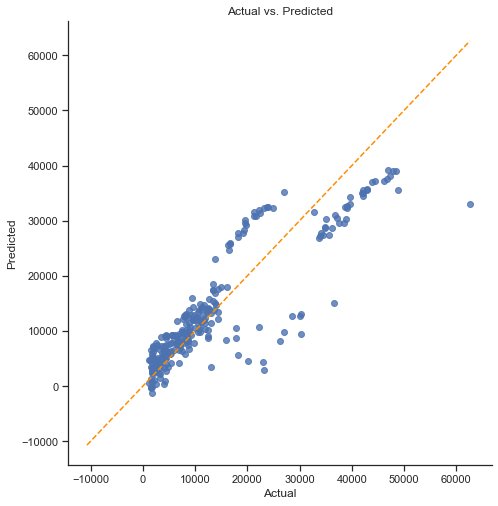

In [21]:
linear_assumption(lin_reg,x_test,y_test);

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 6.299821548956784e-23
Residuals are not normally distributed


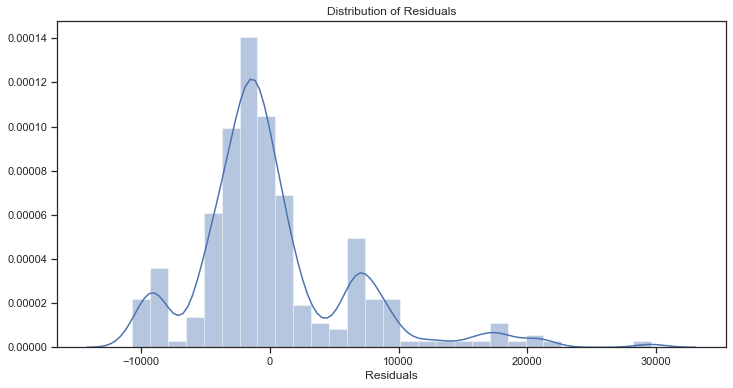


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [22]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')
normal_errors_assumption(lin_reg,x_test,y_test);

Assumption 3: Little to no multicollinearity among predictors


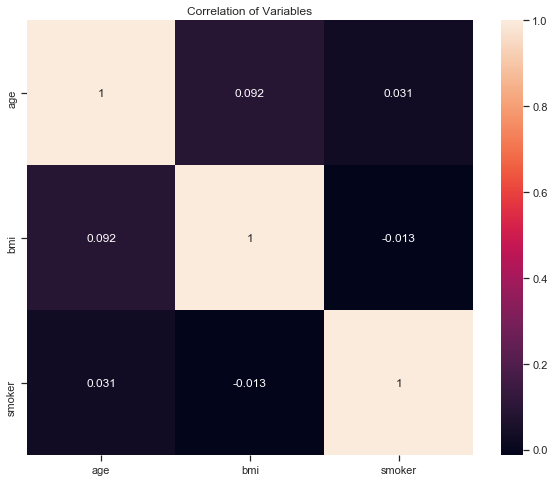

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
age: 7.669528084259533
bmi: 7.75015245151912
smoker: 1.27763126288895

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [23]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')
multicollinearity_assumption(lin_reg,x_test,y_test,['age','bmi','smoker']);

In [24]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')
autocorrelation_assumption(lin_reg,x_test,y_test);

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.1698728763368744
Little to no autocorrelation 

Assumption satisfied


Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


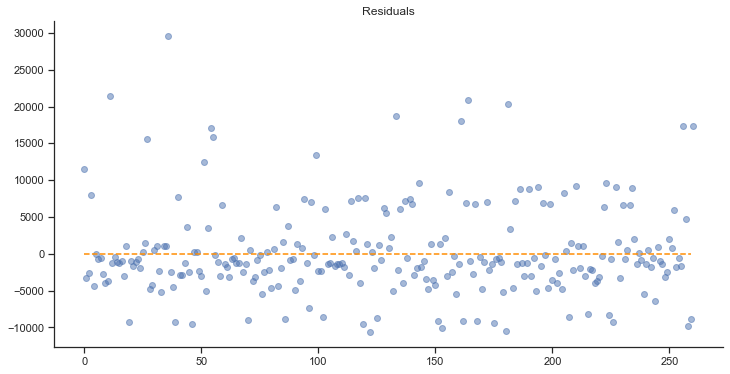

In [25]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()
homoscedasticity_assumption(lin_reg,x_test,y_test);

In [26]:
mae = metrics.mean_absolute_error(y_test, lin_reg.predict(x_test))
mse = metrics.mean_squared_error(y_test, lin_reg.predict(x_test))
print(mae,mse,math.sqrt(mse))

4276.996676365547 37670273.08009565 6137.611349710541
